In [2]:
import torch

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

from PyTorchCML.models import CollaborativeMetricLearning
from datasets import load_dataset


In [3]:
dataset = 'movielens'
data_path = './data'
n_user, n_item, train_set, test_set = load_dataset(dataset, data_path)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
model = CollaborativeMetricLearning(n_user, n_item, 256)

In [6]:
def draw_tsne(epoch):
    weight_path = f'./cml_mintriplet_{epoch}_dmm.pt'
    model.load_state_dict(torch.load(weight_path))
    user_emb_bank = []
    for i in range(n_user//256):
        data = [256 * i + j for j in range(256)]
        try:
            user_emb = model.user_embedding(torch.from_numpy(np.array(data)))
            user_emb_bank.append(user_emb)
        except Exception as e:
            break
    user_embs = torch.vstack(user_emb_bank)
    item_emb_bank = []
    for i in range(n_user//256):
        data = [256 * i + j for j in range(256)]
        try:
            item_emb = model.item_embedding(torch.from_numpy(np.array(data)))
            item_emb_bank.append(item_emb)
        except Exception as e:
            break
    item_embs = torch.vstack(item_emb_bank)
    embs = torch.vstack([user_embs, item_embs])
    labels = [0] * 5888 + [1] * 3840 
    tsne = TSNE(n_components=2)
    points = tsne.fit_transform(embs.cpu().detach().numpy().tolist())
    labels = np.array(labels)
    color = ['#4A36F5', '#FFC820']
    for i in range(2):
        plt.scatter(points[:, 0][labels == i], points[:, 1][labels == i], s=1, color=color[i])

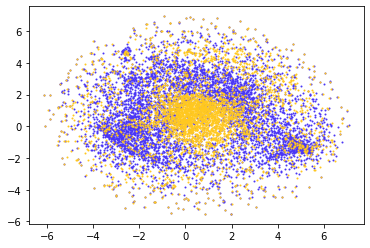

In [7]:
draw_tsne(9)

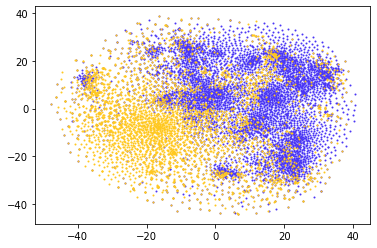

In [8]:
draw_tsne(19)

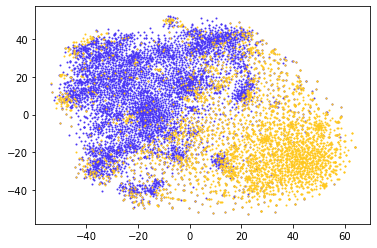

In [9]:
draw_tsne(29)

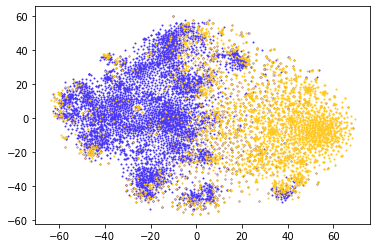

In [10]:
draw_tsne(39)

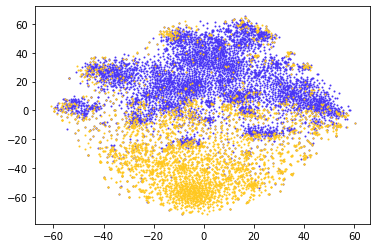

In [11]:
draw_tsne(49)

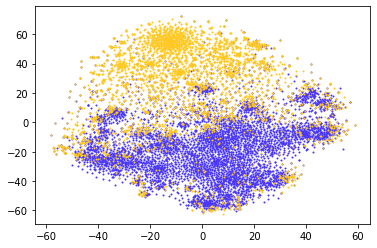

In [12]:
draw_tsne(59)

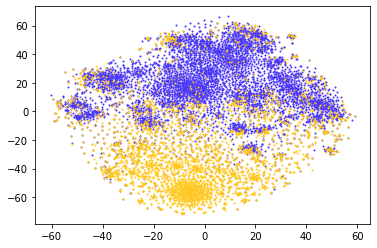

In [13]:
draw_tsne(69)

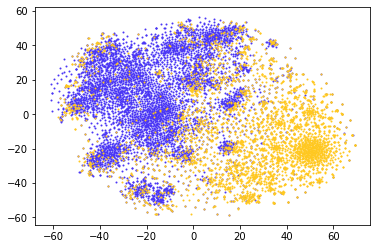

In [14]:
draw_tsne(79)

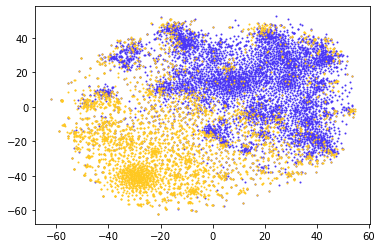

In [15]:
draw_tsne(89)

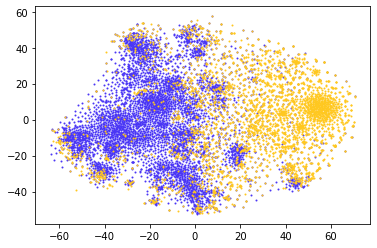

In [16]:
draw_tsne(99)

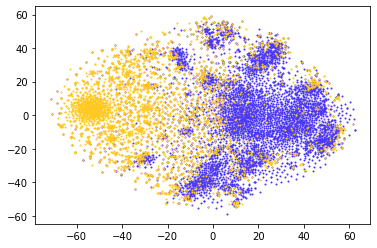

In [17]:
draw_tsne(109)

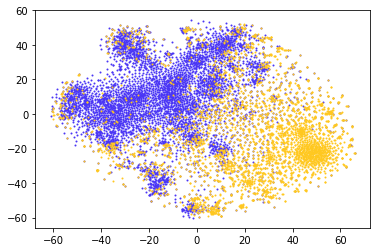

In [18]:
draw_tsne(119)

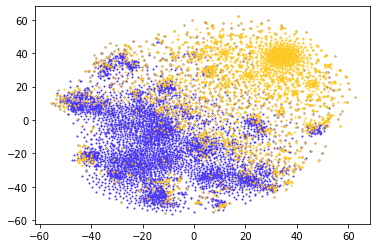

In [19]:
draw_tsne(129)

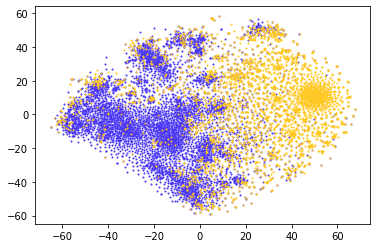

In [20]:
draw_tsne(139)

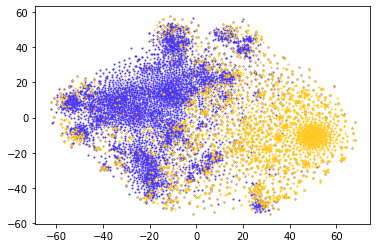

In [21]:
draw_tsne(149)

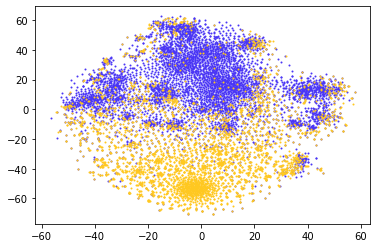

In [22]:
draw_tsne(159)

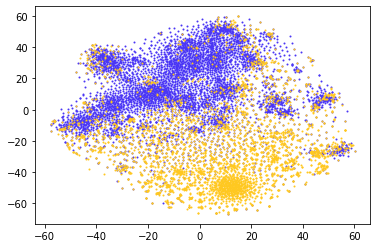

In [23]:
draw_tsne(169)

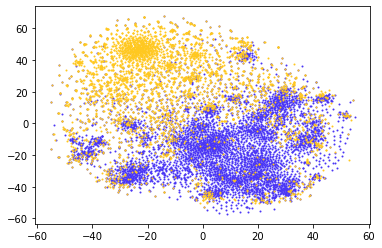

In [24]:
draw_tsne(179)

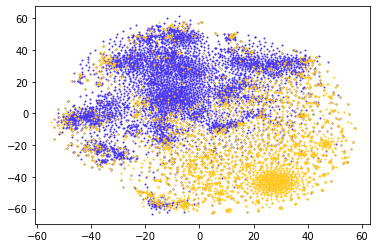

In [25]:
draw_tsne(189)

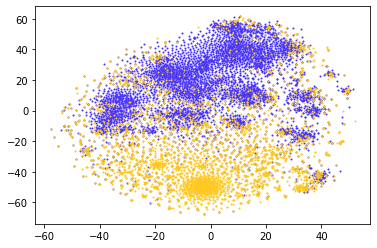

In [26]:
draw_tsne(199)